In [5]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
from collections import Counter
import random
import math
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from sklearn import linear_model
from sklearn.model_selection import KFold as kf
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler

In [6]:
## Reading CSv data into a dataframe
Fraud_dataframe = pd.read_csv('/Users/prathmesh/Downloads/test3.csv')
## dropping any existing null or missing values
Fraud_dataframe.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


## plot to understand how many type of transactions and their respective counts

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


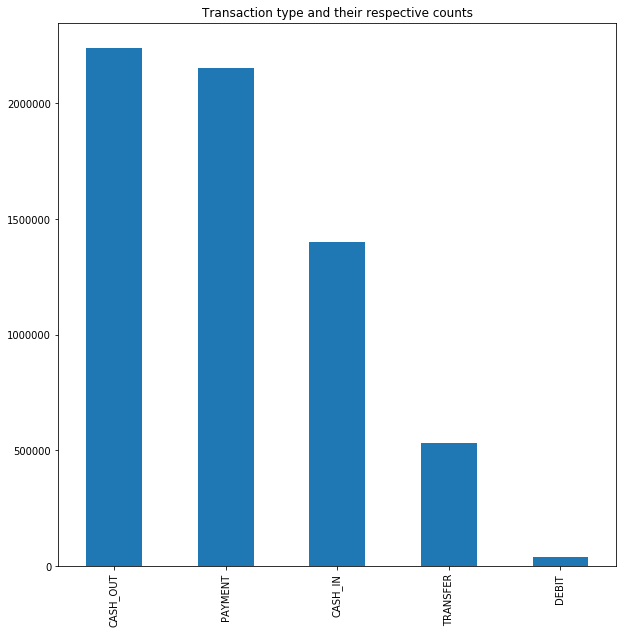

In [10]:
print(Fraud_dataframe.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(10, 10))
Fraud_dataframe.type.value_counts().plot(kind='bar', title="Transaction type and their respective counts", ax=ax, figsize=(10,10))
plt.show()

## we will draw a simple bar chart to check for what transaction types are flagged as fraud and then check for the relations between them

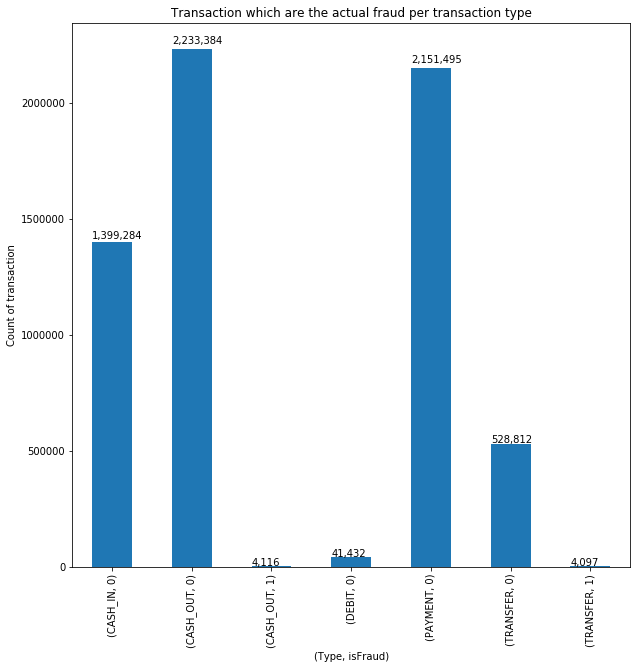

In [11]:
ax = Fraud_dataframe.groupby(['type', 'isFraud']).size().plot(kind='bar', figsize=(10,10))
ax.set_title("Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

### cash_out and transfer types are to be focused upon for further co-relation analysis and prediction